# Calidad de un Vino

Dentro de las variedades del vino, existen distintas calidades de este, donde algunos gustan mas a algunas
personas que otras, esto depende de la gran cantidad de químicos y procesos que se aplican a la producción
de vino. Para el área de negocios el estimar cúal es la calidad del vino en base a la apreciación de la gente es
una tarea bastante difícil.

Para esta actividad se trabajará con dos datasets asociados a variantes tinto y blanco del vino Portugues
”Vinho Verde”. Debido a temas privados solo se cuenta atributos fisioquímicos asociados a un vino en
particular, los cuales corresponden a 11 atributos numéricos descritos en el siguiente link.
Este problema puede ser abordado como clasificación de 11 clases o de regresión, ya que el atributo a estimar,
la calidad quality, es un valor entero entre 0 y 10.

### a. Carga y descripción de los datos

A continuacion se cargaran dos datasets con datos fisioquimicos y la calidad en base a estos, para las variedades de vino blanco y tinto. Las caracteristicas que posee cada dataset son las siguientes:

* 1 - fixed acidity 
* 2 - volatile acidity 
* 3 - citric acid 
* 4 - residual sugar 
* 5 - chlorides 
* 6 - free sulfur dioxide 
* 7 - total sulfur dioxide 
* 8 - density 
* 9 - pH 
* 10 - sulphates 
* 11 - alcohol 
* 12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Se carga el dataset con los datos del vino tinto
df_red = pd.read_csv("winequality-red.csv",sep=";")
#Se crea un vector de unos, numero que representara a esta categoria de vino
ones = np.ones(df_red.shape[0])
#Se agrega la columna tipo al dataset de los vinos tinto
df_red["type"] = ones
#Se carga el dataset con los datos del vino blanco
df_white = pd.read_csv("winequality-white.csv",sep=";")
#Se crea un vector de ceros, numero que representara a esta categoria
zeros = np.zeros(df_white.shape[0])
#Se agrega la columna tipo al dataset de los vinos blanco
df_white["type"] = zeros

#Se concatenan ambos datasets 
df = pd.concat([df_red,df_white], axis=0)

In [2]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [3]:
print("La cantidad total de registros:",df.shape[0])
print("La cantidad de registros correspondientes al tipo 1 -> red wine, es",df_red.shape[0])
print("Porcentaje en la muestra",df_red.shape[0]/df.shape[0]*100)
print("La cantidad de registros correspondientes al tipo 0 -> white wine, es",df_white.shape[0])
print("Porcentaje en la muestra",df_white.shape[0]/df.shape[0]*100)

La cantidad total de registros: 6497
La cantidad de registros correspondientes al tipo 1 -> red wine, es 1599
Porcentaje en la muestra 24.611359088810218
La cantidad de registros correspondientes al tipo 0 -> white wine, es 4898
Porcentaje en la muestra 75.38864091118978


Como podemos ver la cantidad de regisros para el vino blanco es aproximadamente 3 veces más que las pertenecientes al vino tinto.

### b. Clasificación del vino según su calidad

In [4]:
# Se agrega la columna 'good_quality' al dataset
df['good_quality'] = [1 if q>5 else 0 for q in df.quality]

In [5]:
#Se quita la columna quality del dataset
df = df.drop(['quality'],axis=1)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0,0


In [7]:
from sklearn.model_selection import train_test_split

def data_prepration(x):
    #Se guardan solo las caracteristicas, se omite la columna good_quality.
    x_features= x.iloc[:,x.columns != "good_quality"]
    #Se guradan solo las etiquetas correspondietes a las clases.
    x_labels=x.iloc[:,x.columns=="good_quality"]
    #Se separan en subconjuntos los datas, asignando para entrenamiento y testing.
    x_train,x_test,y_train,y_test=train_test_split(x_features,x_labels,test_size=0.25)
    #Se imprime el largo de los nuevos datasets generados. 
    print("Length of training data: %d"%len(x_train))
    print("Length of test data: %d"%len(x_test))
    #Se retornan el train_set y test_set 
    return(x_train,x_test,y_train,y_test)

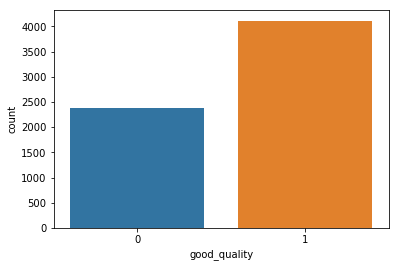

In [8]:
sns.countplot("good_quality",data=df)
plt.show()

In [9]:
count = pd.value_counts(df['good_quality'].values)
print("Cantidad de elementos por clase")
print("=================================================================")
print("=================================================================")
print("Elementos pertenecientes a la clase 0 [Mala calidad] es de", count[0])
print("representa un", count[0]/(count[0] + count[1]), "del total" )
print("=================================================================")
print("Elementos pertenecientes a la clase 1 [Buena calidad] es de", count[1])
print("representa un", count[1]/(count[0] + count[1]), "del total" )
print("=================================================================")

Cantidad de elementos por clase
Elementos pertenecientes a la clase 0 [Mala calidad] es de 2384
representa un 0.36693858704 del total
Elementos pertenecientes a la clase 1 [Buena calidad] es de 4113
representa un 0.63306141296 del total


Como podemos apreciar, tenemos que los datos estan desbalanceados ya que los buenos vinos superan en casi el doble a los malos.

In [47]:
#Se generan los datos de entrenamiento y pruebas.

In [10]:
x_train,x_test,y_train,y_test = data_prepration(df)

Length of training data: 4872
Length of test data: 1625


In [11]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.metrics import classification_report

model_1 = BernoulliNB()
model_1.fit(x_train,y_train.values.ravel())
model_2 = svm.SVC()
model_2.fit(x_train,y_train.values.ravel())
print("=======================================================")
print("Metricas")
print("=======================================================")
print("Naive bayes score:",model_1.score(x_test,y_test))
print("===================================")
print(classification_report(y_test.values.ravel(), model_1.predict(x_test), target_names=['Mala calidad','Buena calidad']))
print("=======================================================")
print("SVM score:",model_2.score(x_test,y_test))
print("===================================")
print(classification_report(y_test.values.ravel(), model_2.predict(x_test), target_names=['Mala calidad','Buena calidad']))
print("=======================================================")

Metricas
Naive bayes score: 0.638153846154
               precision    recall  f1-score   support

 Mala calidad       0.56      0.04      0.07       593
Buena calidad       0.64      0.98      0.78      1032

  avg / total       0.61      0.64      0.52      1625

SVM score: 0.728
               precision    recall  f1-score   support

 Mala calidad       0.69      0.47      0.56       593
Buena calidad       0.74      0.88      0.80      1032

  avg / total       0.72      0.73      0.71      1625



Como podemos apreciar al realizar la prueba de clasificación con los algoritmos de Naive Bayes y SVM, SVM fue ampliamente superior, ya que entrega un f1-score ms balanceado para ambas clases, es decir a la clase que tiene menos resgistros es mejor clasificada.

### c. Clasificacion del vino usando un arbol

In [15]:
from sklearn import tree
from sklearn.metrics import f1_score

model_3 = tree.DecisionTreeClassifier()
model_3.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [126]:
print("=======================================================")
print("hiperparametros por defeto")
print("=======================================================")
print("Entrenamiento - score:",model_3.score(x_train,y_train))
print("===================================")
print(classification_report(y_train.values.ravel(), model_3.predict(x_train), target_names=['Mala calidad','Buena calidad']))
print("=======================================================")
print("Pruebas - score:",model_3.score(x_test,y_test))
print("===================================")
print(classification_report(y_test.values.ravel(), model_3.predict(x_test), target_names=['Mala calidad','Buena calidad']))
print("=======================================================")

hiperparametros por defeto
Entrenamiento - score: 1.0
               precision    recall  f1-score   support

 Mala calidad       1.00      1.00      1.00      1791
Buena calidad       1.00      1.00      1.00      3081

  avg / total       1.00      1.00      1.00      4872

Pruebas - score: 0.777230769231
               precision    recall  f1-score   support

 Mala calidad       0.71      0.66      0.69       593
Buena calidad       0.81      0.84      0.83      1032

  avg / total       0.77      0.78      0.78      1625



In [67]:
y_pred = model_3.predict(x_test)
f1_score(y_test, y_pred, average = "weighted") 

0.77565339703774494

In [68]:
y_pred = model_3.predict(x_test)
f1_score(y_test, y_pred, average = "micro") 

0.77723076923076917

In [82]:
xm = x_train.as_matrix()
ym = y_train.values.ravel()

In [144]:
from sklearn.model_selection import KFold

def cross_validation(xm,ym,model,k):
    kf = KFold(n_splits=k)
    f1score = []
    for train, test in kf.split(x_train):
        cross_train = xm[train]
        cross_test = xm[test]
        model.fit(cross_train, ym[train])
        y_pred = model.predict(cross_test)
        f1score.append(f1_score(ym[test], y_pred, average = "weighted"))
    return(np.mean(f1score))

def f1score_var_param(depth,f,crit):
    f1 = []
    for i in range(1,depth):
        model = tree.DecisionTreeClassifier(max_depth=i,max_features=f,criterion=crit)
        f1.append(cross_validation(xm,ym,model,10))
    return f1

In [150]:
l = []
l.append(f1score_var_param(11,"log2","gini"))
l.append(f1score_var_param(11,"log2","entropy"))
l.append(f1score_var_param(11,"sqrt","gini"))
l.append(f1score_var_param(11,"sqrt","entropy"))

/home/phorth/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


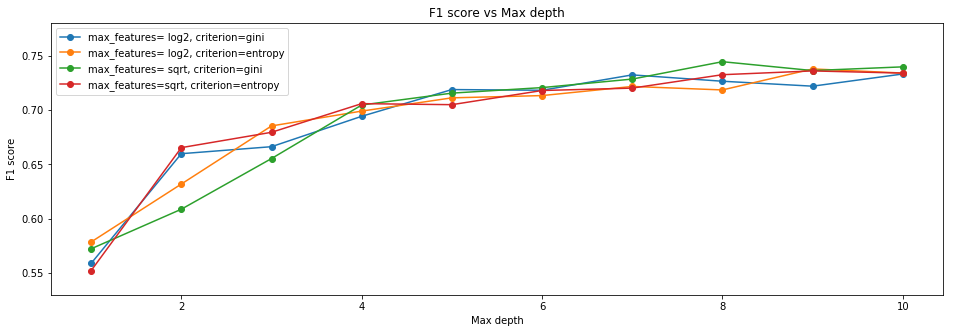

In [151]:
depth = np.arange(1,11)
plt.figure(figsize=(16,5))
plt.xlabel("Max depth")
plt.ylim((0.53,0.78))
plt.ylabel("F1 score")
plt.title("F1 score vs Max depth")
plt.plot(depth,l[0], '-o',label= "max_features= log2, criterion=gini")
plt.plot(depth,l[1], '-o',label= "max_features= log2, criterion=entropy")
plt.plot(depth,l[2], '-o',label= "max_features= sqrt, criterion=gini")
plt.plot(depth,l[3], '-o',label= "max_features=sqrt, criterion=entropy")
plt.legend(loc = "best")
plt.show()

En base a las pruebas realizadas con cada parametro en la validación cruzada escogeremos los parametros y mediremos las metricas para el conjunto de validacion y test. 

In [154]:
model_4 = tree.DecisionTreeClassifier(criterion="entropy",max_features="sqrt",max_depth=5)
model_4.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [156]:
print("=======================================================")
print("hiperparametros: criterion = entropy - max_depth = 5 - max_features = sqrt")
print("=======================================================")
print("Entrenamiento - score:",model_4.score(x_train,y_train))
print("===================================")
print(classification_report(y_train.values.ravel(), model_4.predict(x_train), target_names=['Mala calidad','Buena calidad']))
print("=======================================================")
print("Pruebas - score:",model_4.score(x_test,y_test))
print("===================================")
print(classification_report(y_test.values.ravel(), model_4.predict(x_test), target_names=['Mala calidad','Buena calidad']))
print("=======================================================")

hiperparametros: criterion = entropy - max_depth = 5 - max_features = sqrt
Entrenamiento - score: 0.736042692939
               precision    recall  f1-score   support

 Mala calidad       0.65      0.61      0.63      1791
Buena calidad       0.78      0.81      0.80      3081

  avg / total       0.73      0.74      0.73      4872

Pruebas - score: 0.724307692308
               precision    recall  f1-score   support

 Mala calidad       0.63      0.59      0.61       593
Buena calidad       0.77      0.80      0.79      1032

  avg / total       0.72      0.72      0.72      1625



### d y e. Ensamblador de arboles

In [196]:
from sklearn.ensemble import RandomForestClassifier

f1_random_forest_train = []
f1_random_forest_test = []
for i in range(1,11):
    model = RandomForestClassifier(n_estimators=i, max_depth=5,n_jobs=-1)
    model.fit(x_train,y_train.values.ravel())
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    f1_random_forest_test.append(f1_score(y_test.values.ravel(), y_pred_test, average = "weighted"))
    f1_random_forest_train.append(f1_score(y_train.values.ravel(), y_pred_train, average = "weighted"))
    

In [207]:
from sklearn.ensemble import AdaBoostClassifier

f1_adaboost_train = []
f1_adaboost_test = []
for i in range(1,11):
    model = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=i)
    model.fit(x_train,y_train.values.ravel())
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    f1_adaboost_train.append(f1_score(y_test.values.ravel(), y_pred_test, average = "weighted"))
    f1_adaboost_test.append(f1_score(y_train.values.ravel(), y_pred_train, average = "weighted"))
    

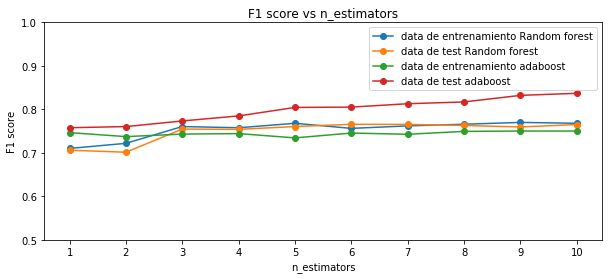

In [209]:
x = np.arange(1,11)
plt.figure(figsize=(10,4))
plt.xlabel("n_estimators")
plt.xticks(depth)
plt.ylim([0.5,1])
plt.ylabel("F1 score")
plt.title("F1 score vs n_estimators")
plt.plot(x,f1_random_forest_train, '-o',label= "data de entrenamiento Random forest")
plt.plot(x,f1_random_forest_test, '-o',label= "data de test Random forest")
plt.plot(x,f1_adaboost_train, '-o',label= "data de entrenamiento adaboost")
plt.plot(x,f1_adaboost_test, '-o',label= "data de test adaboost")
plt.legend(loc = "best")
plt.show()